<a href="https://colab.research.google.com/github/aayushkubb/Deep_Learning_Tutorial/blob/master/LSTM_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 

# Problem Statement
Create a text classifier that can help us disambiguate Spam/Ham

# Evaluation Metrics

# Import

In [99]:
import pandas as pd
import numpy as np

#Visualization
from matplotlib import pyplot as plt


#Classification Metrics
from sklearn.metrics import classification_report

#Random Module
import random

#Wordcloud
from wordcloud import WordCloud, STOPWORDS


#NLTK Tokenize
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('all')


#Counter
from collections import Counter

import re
from sklearn.model_selection import train_test_split


import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


#import library
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.layers import  Flatten, BatchNormalization
from keras.layers import MaxPooling1D
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers


import sklearn
from keras.callbacks import ModelCheckpoint


from keras.layers.recurrent import SimpleRNN, LSTM

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

#Read the dataset

In [2]:
sms_data = pd.read_csv("/content/drive/MyDrive/Case studies/spam.csv",encoding="ISO-8859-1")
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_data['v1'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: v1, dtype: float64

In [4]:
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={"v1":"Target","v2":"SMS"})
sms_data.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Baseline Model

In [5]:
y=sms_data['Target'].apply(lambda x: 1 if x.lower()=='spam' else 0)

In [6]:
#Create a model where everything is a "ham"
y_pred=np.zeros(len(y))
print("Baseline Model -1")
print(classification_report(y,y_pred))



Baseline Model -1
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.43      0.50      0.46      5572
weighted avg       0.75      0.87      0.80      5572



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -2")
print(classification_report(y,y_pred))

Baseline Model -2
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      4825
           1       0.13      0.50      0.21       747

    accuracy                           0.50      5572
   macro avg       0.50      0.50      0.42      5572
weighted avg       0.77      0.50      0.58      5572



In [8]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,0,0,0,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -3")
print(classification_report(y,y_pred))

Baseline Model -3
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4825
           1       0.14      0.20      0.17       747

    accuracy                           0.73      5572
   macro avg       0.50      0.51      0.50      5572
weighted avg       0.77      0.73      0.75      5572



In [9]:
#Create a model where you randomly assign "spam" or "ham"
options=[1,1,1,1,0]
y_pred=random.choices(options,k=len(y))

print("Baseline Model -4")
print(classification_report(y,y_pred))

Baseline Model -4
              precision    recall  f1-score   support

           0       0.87      0.20      0.33      4825
           1       0.13      0.80      0.23       747

    accuracy                           0.28      5572
   macro avg       0.50      0.50      0.28      5572
weighted avg       0.77      0.28      0.32      5572



# Plot the Wordcloud

In [10]:
text=" ".join(sms_data['SMS'].apply(lambda x: x.lower()).tolist())


In [11]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(text)

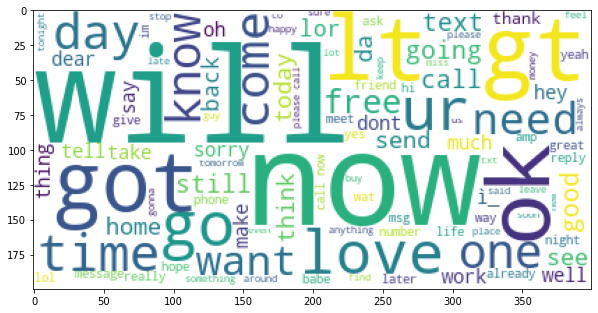

In [12]:
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

## Check WC for the SPAM/HAM dataset

In [13]:
ham_text=" ".join(sms_data[sms_data['Target']=='ham']['SMS'].apply(lambda x: x.lower()).tolist())
spam_text=" ".join(sms_data[sms_data['Target']!='ham']['SMS'].apply(lambda x: x.lower()).tolist())


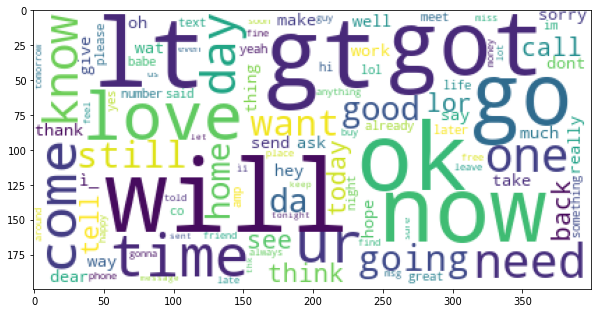

In [14]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS).generate(ham_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

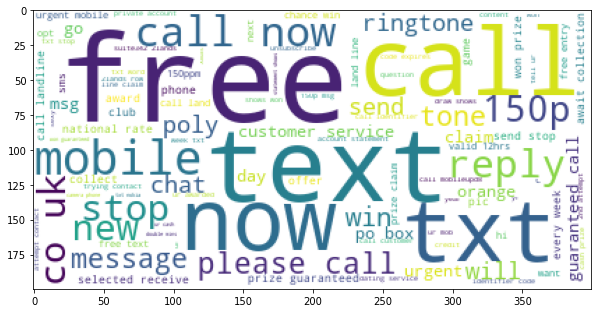

In [15]:
#Create a Wordcloud
wordcloud=WordCloud(max_words=100,background_color='white',stopwords=STOPWORDS,).generate(spam_text)
# Display the WC
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.show()

# Baseline Model using text

In [16]:
def text_classifier(sentence):
  if "free" in sentence or "call now" in sentence or "prize guaranteed" in sentence or \
  "please call" in sentence or "guaranteed call" in sentence or "customer service" in sentence:
    return 1
  else:
    return 0

In [17]:
y_pred=sms_data['SMS'].apply(lambda x : text_classifier(x))


In [18]:
print("Baseline Classifier using Text")
print(classification_report(y,y_pred))

Baseline Classifier using Text
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      4825
           1       0.61      0.13      0.22       747

    accuracy                           0.87      5572
   macro avg       0.74      0.56      0.57      5572
weighted avg       0.84      0.87      0.84      5572



In [19]:
def collactions(sentences):
  bigrams = nltk.collocations.BigramAssocMeasures()
  bigramFinder = nltk.collocations.BigramCollocationFinder.from_documents(sentences)

  #bigrams
  bigram_freq = bigramFinder.ngram_fd.items()
  bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)

  return bigramFreqTable




In [20]:
sentences=[word_tokenize(i) for i in sms_data['SMS'].tolist()]
collactions(sentences)

,bigram,freq
333,"(., I)",377
909,"(&, lt)",314
913,"(&, gt)",314
910,"(lt, ;)",314
914,"(gt, ;)",314
...,...,...
21893,"(call, like)",1
21894,"(times, oh)",1
21895,"(No, give)",1
21896,"(us, hypertension)",1


Data is not cleaned, lets first clean the dataset and then move forward

In [21]:
def character_counter(sentence_list):
  return Counter(" ".join(sentence_list))

def word_counter(sentence_list):
  word_count=[]
  for i in sentence_list:
    word_count.extend(i.split())
  return Counter(word_count)

In [22]:
Counter("My name is is ".split())

Counter({'My': 1, 'is': 2, 'name': 1})

In [23]:
character_counter(sms_data['SMS'])

Counter({'\r': 2,
         ' ': 86960,
         '!': 1381,
         '"': 265,
         '#': 287,
         '$': 23,
         '%': 10,
         '&': 916,
         "'": 1871,
         '(': 117,
         ')': 494,
         '*': 311,
         '+': 137,
         ',': 1913,
         '-': 574,
         '.': 11048,
         '/': 418,
         '0': 3186,
         '1': 1745,
         '2': 1699,
         '3': 851,
         '4': 1042,
         '5': 1067,
         '6': 801,
         '7': 856,
         '8': 1310,
         '9': 659,
         ':': 740,
         ';': 764,
         '<': 6,
         '=': 47,
         '>': 30,
         '?': 1541,
         '@': 35,
         'A': 1856,
         'B': 875,
         'C': 1389,
         'D': 1122,
         'E': 1892,
         'F': 643,
         'G': 844,
         'H': 1522,
         'I': 3462,
         'J': 299,
         'K': 388,
         'L': 1089,
         'M': 1206,
         'N': 1619,
         'O': 1811,
         'P': 960,
         'Q': 73,
         'R': 11

In [24]:
def data_preprocessing(x):
  return re.sub("[^a-zA-Z]"," ", x.lower())


In [25]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x:data_preprocessing(x))

In [26]:
character_counter(sms_data['SMS'])

Counter({' ': 124818,
         'a': 25248,
         'b': 5310,
         'c': 8876,
         'd': 11275,
         'e': 34934,
         'f': 5745,
         'g': 8284,
         'h': 14204,
         'i': 22439,
         'j': 935,
         'k': 4533,
         'l': 15757,
         'm': 10573,
         'n': 21738,
         'o': 28962,
         'p': 6811,
         'q': 236,
         'r': 17738,
         's': 18898,
         't': 27921,
         'u': 12310,
         'v': 3504,
         'w': 8462,
         'x': 1586,
         'y': 10396,
         'z': 500})

In [27]:
len(word_counter(sms_data['SMS']))

7708

In [28]:
cc=word_counter(sms_data['SMS'])

In [29]:
# cc['com']

# Let's prep data for training

In [30]:
sms_data['SMS']=sms_data['SMS'].apply(lambda x: x.strip())

In [31]:
sms_data=sms_data[sms_data['SMS'].apply(lambda x: len(x)>=2)]

In [32]:
# Split data into training and test parts
train,test=train_test_split(sms_data,test_size=0.2,random_state=1)

# Tokenizer & Embeddings

In [33]:
train['SMS'].apply(lambda X: len(X)).describe()

count    4454.000000
mean       79.040413
std        59.868751
min         2.000000
25%        35.000000
50%        60.000000
75%       119.750000
max       908.000000
Name: SMS, dtype: float64

In [34]:
#Parameters

MAX_NB_WORDS=6000 #most frezent 6k words in the dataset
MAX_SEQUENCE_LENGTH=300



In [35]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.SMS)
train_sequences = tokenizer.texts_to_sequences(train.SMS)
test_sequences = tokenizer.texts_to_sequences(test.SMS)


In [36]:
# dictionary containing words and their index
word_index = tokenizer.word_index

print(word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'is': 8, 'in': 9, 'me': 10, 'my': 11, 'it': 12, 'for': 13, 'your': 14, 'of': 15, 's': 16, 'that': 17, 'call': 18, 'have': 19, 'on': 20, 't': 21, 'now': 22, 'can': 23, 'm': 24, 'but': 25, 'so': 26, 'are': 27, 'not': 28, 'we': 29, 'or': 30, 'at': 31, 'do': 32, 'ur': 33, 'with': 34, 'be': 35, 'get': 36, 'if': 37, 'will': 38, 'just': 39, 'no': 40, 'this': 41, 'gt': 42, 'lt': 43, 'when': 44, 'up': 45, 'how': 46, 'ok': 47, 'go': 48, 'all': 49, 'from': 50, 'free': 51, 'll': 52, 'what': 53, 'out': 54, 'know': 55, 'he': 56, 'day': 57, 'like': 58, 'got': 59, 'then': 60, 'good': 61, 'am': 62, 'was': 63, 'there': 64, 'come': 65, 'its': 66, 'love': 67, 'time': 68, 'only': 69, 'send': 70, 'want': 71, 'as': 72, 'text': 73, 'n': 74, 'one': 75, 'r': 76, 'don': 77, 'by': 78, 'p': 79, 'she': 80, 'going': 81, 'today': 82, 'about': 83, 'need': 84, 'txt': 85, 'lor': 86, 'home': 87, 'see': 88, 'k': 89, 'back': 90, 'stop': 91, 'sorry': 92, 'd': 9

In [37]:
# make each sequence to 300
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

print(train_data.shape)
print(test_data.shape)


(4454, 300)
(1114, 300)


In [38]:
train_labels = train['Target']
test_labels = test['Target']

In [39]:
# converts the character array to numeric array. Assigns levels to unique labels.
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3876,  578]))
(array([0, 1]), array([945, 169]))


In [40]:
test_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
from keras.utils.np_utils import to_categorical

labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of test-label tensor:', labels_test.shape)


Shape of data tensor: (4454, 300)
Shape of label tensor: (4454, 2)
Shape of test-label tensor: (1114, 2)


In [42]:
# sampling some o/p to see
print(train_labels[:5])   # here we see a single list of 1's and 0's. Where 1 means spam and 0 means ham 
print(labels_train[:5])   # here you would see One hot encoded o/p.  i.e 2 columns ham spam


[0 0 1 0 0]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Model using CNN



## Model using one-hot output label
Treating any problem as Multi-class problem


In [82]:


print('Training CNN 1D model.')
EMBEDDING_DIM=100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])

Training CNN 1D model.


In [83]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 100)          600000    
_________________________________________________________________
dropout_20 (Dropout)         (None, 300, 100)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 296, 128)          64128     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 59, 128)           0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 59, 128)           0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 59, 128)           512       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 55, 128)          

In [84]:
# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 20s 260ms/step - loss: 0.4881 - acc: 0.8144 - val_loss: 0.4073 - val_acc: 0.8483
Epoch 2/2
70/70 [==============================] - 18s 252ms/step - loss: 0.2080 - acc: 0.9239 - val_loss: 0.3789 - val_acc: 0.8483


In [85]:
predicted=model.predict(test_data)

In [86]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(np.argmax(labels_test,axis=1), np.argmax(predicted,axis=1)))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

    accuracy                           0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(labels_test, predicted.round()))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

   micro avg       0.85      0.85      0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114
 samples avg       0.85      0.85      0.85      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Try using different threshold

In [92]:
predicted_labels=[]
for i in predicted:
  if i[1]>0.98:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)


In [93]:
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(np.argmax(labels_test,axis=1), predicted_labels))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       945
           1       0.00      0.00      0.00       169

    accuracy                           0.85      1114
   macro avg       0.42      0.50      0.46      1114
weighted avg       0.72      0.85      0.78      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model using label encoded output label

In [97]:


print('Training CNN 1D model.')
EMBEDDING_DIM=100
model = Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])



#define the checkpoint
file_name_path="weights-CNN-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(file_name_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
# # https://machinelearningmastery.com/check-point-deep-learning-models-keras/

callbacks = [checkpoint]


# Train
model.fit(train_data, train_labels, batch_size=64,  epochs=1,validation_data=(test_data, test_labels),callbacks=callbacks)

Training CNN 1D model.
70/70 [==============================] - 20s 259ms/step - loss: 0.0000e+00 - acc: 0.1323 - val_loss: 0.0000e+00 - val_acc: 0.1517

Epoch 00001: loss improved from inf to 0.00000, saving model to weights-CNN-01-0.0000.hdf5


In [79]:
predicted=model.predict(test_data)
print("Accuracy of the One-Hot model/ Multi-Class Problem")
print(classification_report(test_labels, predicted))

Accuracy of the One-Hot model/ Multi-Class Problem
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       945
           1       0.15      1.00      0.26       169

    accuracy                           0.15      1114
   macro avg       0.08      0.50      0.13      1114
weighted avg       0.02      0.15      0.04      1114



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Simple RNN

In [119]:
model=Sequential()
model.add(Embedding(MAX_NB_WORDS,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH))
model.add(SimpleRNN(2,input_shape=(None,1)))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['acc'])





In [120]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 100)          600000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 2)                 206       
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 6         
Total params: 600,212
Trainable params: 600,212
Non-trainable params: 0
_________________________________________________________________


In [125]:
# Train
model.fit(train_data, labels_train, batch_size=64,  epochs=2,validation_data=(test_data, labels_test))

Epoch 1/2
70/70 [==============================] - 5s 74ms/step - loss: 0.0558 - acc: 0.9906 - val_loss: 0.0612 - val_acc: 0.9892
Epoch 2/2
70/70 [==============================] - 5s 73ms/step - loss: 0.0420 - acc: 0.9926 - val_loss: 0.0532 - val_acc: 0.9874


In [126]:
predicted=model.predict(test_data)

In [127]:
print("Accuracy of the Simple RNN Model")
print(classification_report(labels_test, predicted.round()))

Accuracy of the Simple RNN Model
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       945
           1       0.98      0.93      0.96       169

   micro avg       0.99      0.99      0.99      1114
   macro avg       0.98      0.97      0.98      1114
weighted avg       0.99      0.99      0.99      1114
 samples avg       0.99      0.99      0.99      1114

